In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager,rc
import time
import pandas as pd
import cx_Oracle

from IPython import display

font_location = "C:\Windows\Fonts\malgun.ttf"
font_name = font_manager.FontProperties(fname=font_location).get_name()
rc('font',family=font_name)
plt.rcParams['axes.unicode_minus'] = False

In [4]:
con = cx_Oracle.connect('open_source/1111@localhost:1521/xe')
cur = con.cursor()

In [5]:
cur.execute('select * from air_temp order by 관측시간')

columns = ['관측소코드','관측소명', '관측시간','기온']
air_temp = pd.DataFrame(cur,columns = columns)

air_temp

,관측소코드,관측소명,관측시간,기온
0,DT_0013,울릉도,2022-12-29 00:01:00,4.4
1,DT_0001,인천,2022-12-29 00:01:00,-3.3
2,DT_0004,제주,2022-12-29 00:01:00,6.4
3,DT_0013,울릉도,2022-12-29 00:02:00,4.5
4,DT_0001,인천,2022-12-29 00:02:00,-3.3
...,...,...,...,...
1720,DT_0013,울릉도,2022-12-29 09:34:00,2.8
1721,DT_0004,제주,2022-12-29 09:34:00,5.7
1722,DT_0001,인천,2022-12-29 09:35:00,-2.8
1723,DT_0013,울릉도,2022-12-29 09:35:00,2.8


In [6]:
def plt_update_2(ax):
    cur.execute("""select * from air_temp where 관측소명 = '울릉도' order by 관측시간""")

    columns = ['관측소코드','관측소명', '관측시간','기온']
    air_temp_dt13 = pd.DataFrame(cur,columns = columns)
    ax.plot(air_temp_dt13['관측시간'],air_temp_dt13['기온'], color = 'pink', label = '울릉도')

    hdisplay.update(fig)

In [7]:
def plt_update(ax):
    cur.execute("""select * from air_temp where 관측소명 = '인천' order by 관측시간""")

    columns = ['관측소코드','관측소명', '관측시간','기온']
    air_temp_dt01 = pd.DataFrame(cur,columns = columns)
    ax.plot(air_temp_dt01['관측시간'],air_temp_dt01['기온'], color = 'green', label = '인천')

    hdisplay.update(fig)

In [8]:
def plt_update_3(ax):
    cur.execute("""select * from air_temp where 관측소명 = '제주' order by 관측시간""")

    columns = ['관측소코드','관측소명', '관측시간','기온']
    air_temp_dt04 = pd.DataFrame(cur,columns = columns)
    ax.plot(air_temp_dt04['관측시간'],air_temp_dt04['기온'], color = 'blue', label = '제주')
    
    hdisplay.update(fig)

#### blue => 제주, green => 인천, pink => 울릉도

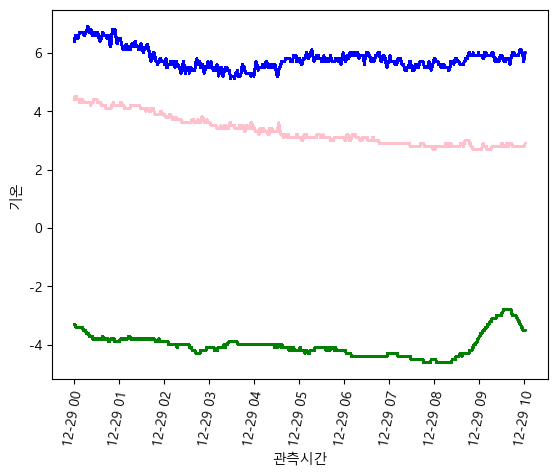

In [ ]:
fig,ax = plt.subplots(1,1)
plt.xticks(rotation=80)
# plt.xlim(-2.11,-2.12)
hdisplay = display.display("", display_id=True)

ax.set_xlabel('관측시간')
ax.set_ylabel('기온')

# plt_update(ax)
for f in range(100000):
    plt_update(ax)
    plt_update_2(ax)
    plt_update_3(ax)
    #plt.legend(loc='center right')
    time.sleep(1)

plt.close()